In [ ]:
!pip install jupyter scikit-learn torch matplotlib openai python-dotenv pandas tiktoken

## The First Neural Network: Perceptron
!Codes are generated with ChatGPT 3.5

In [226]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
torch.manual_seed(42)

In [227]:
n_samples = 100
mean1 = [2, 2]
mean2 = [4, 4]
cov = [[0.5, 0], [0, 0.5]]  # diagonal covariance

data_class0 = np.random.multivariate_normal(mean1, cov, n_samples // 2)
data_class1 = np.random.multivariate_normal(mean2, cov, n_samples // 2)

features = np.vstack((data_class0, data_class1))
labels = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2))).reshape(-1, 1)

# Convert to PyTorch tensors
data_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32)

#features = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], dtype=torch.float32) # frequency of free, email length
#labels = torch.tensor([[0.0], [1.0], [1.0], [0.0]], dtype=torch.float32) # binary= spam or not

# XOR Example
#n_samples = 100
#features = np.random.randn(n_samples, 2)
#labels = (features[:, 0] * features[:, 1] > 0).astype(np.float32).reshape(-1, 1)  # Labels: 1 if x1*x2 > 0, else 0

In [228]:
import pandas as pd
df = pd.DataFrame({'FreqOfFree': features[:, 0], 'EmailLength': features[:, 1], "IsSpam": np.squeeze(labels)})
df.head(100)

,FreqOfFree,EmailLength,IsSpam
0,2.351230,1.902232,0.0
1,2.457985,3.076945,0.0
2,1.834429,1.834440,0.0
3,3.116672,2.542658,0.0
4,1.668031,2.383648,0.0
...,...,...,...
95,3.684266,4.605565,1.0
96,4.151387,3.119130,1.0
97,4.122457,4.272461,1.0
98,3.375018,4.108700,1.0


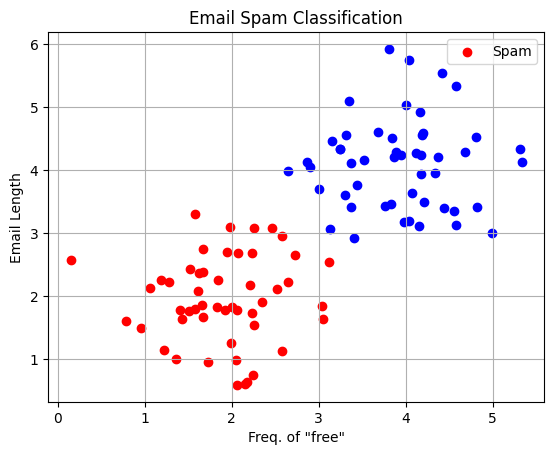

In [229]:
# Plot the data
for i in range(len(features)):
    if labels[i] == 0:
        plt.scatter(features[i, 0], features[i, 1], c='red', label='Spam' if i == 0 else "")
    else:
        plt.scatter(features[i, 0], features[i, 1], c='blue', label='Not Spam' if i == 1 else "")

# Add labels and title
plt.xlabel('Freq. of "free"')
plt.ylabel('Email Length')
plt.title('Email Spam Classification')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.grid(True)
plt.show()

![image](./assets/llm_in_action_101_perceptron.png)

In [230]:
# Define the Perceptron model with a single neuron
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        # Single linear layer with 2 inputs and 1 output (binary classification)
        self.fc = nn.Linear(2, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.fc(x))  # Apply sigmoid activation function

# Initialize the Perceptron model
model = Perceptron()

print(model.fc.weight.data)
print(model.fc.bias)

tensor([[0.5406, 0.5869]])
Parameter containing:
tensor([-0.1657], requires_grad=True)


### Training

Epoch [1/300], Loss: 1.0811, weights:tensor([[0.4594, 0.5033]])  bias:Parameter containing:
tensor([-0.2085], requires_grad=True)
Epoch [1/300], Loss: 0.9322, weights:tensor([[0.3845, 0.4261]])  bias:Parameter containing:
tensor([-0.2486], requires_grad=True)
Epoch [2/300], Loss: 0.8076, weights:tensor([[0.3184, 0.3580]])  bias:Parameter containing:
tensor([-0.2852], requires_grad=True)
Epoch [3/300], Loss: 0.7123, weights:tensor([[0.2638, 0.3017]])  bias:Parameter containing:
tensor([-0.3175], requires_grad=True)
Epoch [4/300], Loss: 0.6480, weights:tensor([[0.2223, 0.2589]])  bias:Parameter containing:
tensor([-0.3452], requires_grad=True)
Epoch [5/300], Loss: 0.6107, weights:tensor([[0.1936, 0.2294]])  bias:Parameter containing:
tensor([-0.3686], requires_grad=True)
Epoch [6/300], Loss: 0.5918, weights:tensor([[0.1756, 0.2110]])  bias:Parameter containing:
tensor([-0.3886], requires_grad=True)
Epoch [7/300], Loss: 0.5828, weights:tensor([[0.1653, 0.2005]])  bias:Parameter containing

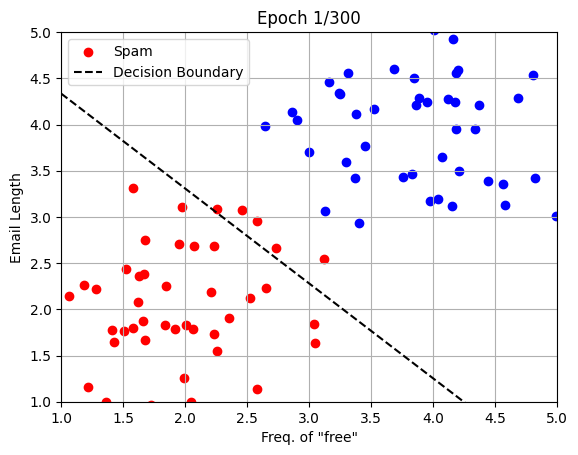

In [231]:
import torch.optim as optim
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent

data_tensor = torch.tensor(features, dtype=torch.float32)
label_tensor = torch.tensor(labels, dtype=torch.float32)

fig, ax = plt.subplots()
x_range = np.linspace(1, 5, 100)

def update(epoch):
    ax.clear()
    # Forward pass
    outputs = model(data_tensor)
    loss = criterion(outputs, label_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if True:#(epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, weights:{str(model.fc.weight.data)}  bias:{str(model.fc.bias)}')
        for i in range(len(features)):
            if labels[i] == 0:
                ax.scatter(features[i, 0], features[i, 1], c='red', label='Spam' if i == 0 else "")
            else:
                ax.scatter(features[i, 0], features[i, 1], c='blue', label='Not Spam' if i == 1 else "")
        
        # Get weights and bias
        with torch.no_grad():
            weights = model.fc.weight.data.numpy()
            bias = model.fc.bias.data.numpy()
    
        # Calculate decision boundary line
        y_range = -(weights[0, 0] * x_range + bias) / weights[0, 1]
        ax.plot(x_range, y_range, 'k--', label='Decision Boundary')
    
        # Set plot limits and labels
        ax.set_xlim(1, 5)
        ax.set_ylim(1, 5)
        ax.set_xlabel('Freq. of "free"')
        ax.set_ylabel('Email Length')
        ax.set_title(f'Epoch {epoch+1}/{num_epochs}')
        ax.legend(loc='best')
        ax.grid(True)

# Training loop
num_epochs = 300
ani = FuncAnimation(fig, update, frames=num_epochs, repeat=False)
# Display the animation inline

with open('output.html', 'w') as file:
    file.write(HTML(ani.to_jshtml()).data)

In [232]:
print(model.fc.weight.data)
print(model.fc.bias)

tensor([[0.6108, 0.5946]])
Parameter containing:
tensor([-3.1875], requires_grad=True)


### Save model

In [233]:
torch.save(model.state_dict(), "perceptron.pt")

### Use Pretrained model

In [234]:
model = Perceptron()
model.load_state_dict(torch.load("perceptron.pt"))
model.eval()

Perceptron(
  (fc): Linear(in_features=2, out_features=1, bias=True)
)

In [235]:
print(model.fc.weight.data)
print(model.fc.bias)

tensor([[0.6108, 0.5946]])
Parameter containing:
tensor([-3.1875], requires_grad=True)


### Inference

In [236]:
model(torch.tensor([3.0, 2.5]))

tensor([0.5328], grad_fn=<SigmoidBackward0>)

## Next Word Predictor with Neural Network
Prompt: `give Feedforward Neural Networks example as next word predictor in torch`

![image](./assets/llm_in_action_101_word_predictor.png)

### 1. Import Required Libraries

In [237]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np


### 2. Prepare the Data

In [238]:
# Example sentences
sentences = [
    "I like machine learning",
    "I love deep learning",
    "I enjoy studying data science"
]

# Build vocabulary
vocab = set(" ".join(sentences).split())
word2idx = {word: i for i, word in enumerate(vocab)}
idx2word = {i: word for word, i in word2idx.items()}

In [239]:
print(vocab)
print(word2idx)

{'science', 'learning', 'machine', 'like', 'deep', 'I', 'enjoy', 'data', 'love', 'studying'}
{'science': 0, 'learning': 1, 'machine': 2, 'like': 3, 'deep': 4, 'I': 5, 'enjoy': 6, 'data': 7, 'love': 8, 'studying': 9}


In [240]:
# Hyperparameters
sequence_length = 3
embedding_dim = 10
hidden_dim = 20
vocab_size = len(vocab)
batch_size = 2
num_epochs = 100

# Create training data
def make_data(sentences):
    inputs, targets = [], []
    for sentence in sentences:
        words = sentence.split()
        for i in range(len(words) - sequence_length):
            inputs.append([word2idx[words[j]] for j in range(i, i+sequence_length)])
            targets.append(word2idx[words[i+sequence_length]])
    return inputs, targets

inputs, targets = make_data(sentences)
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

### 3. Define the Dataset and DataLoader

In [241]:
class WordDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

dataset = WordDataset(inputs, targets)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


### 4. Define the Feedforward Neural Network Model

In [242]:
class FeedforwardNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(FeedforwardNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(sequence_length * embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = FeedforwardNN(vocab_size, embedding_dim, hidden_dim)

In [243]:
model.embedding

Embedding(10, 10)

### 5. Define Loss Function and Optimizer

In [244]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### 6. Train the Model


In [245]:
for epoch in range(num_epochs):
    for batch_inputs, batch_targets in dataloader:
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 1.9818
Epoch [20/100], Loss: 1.8720
Epoch [30/100], Loss: 1.6155
Epoch [40/100], Loss: 0.8123
Epoch [50/100], Loss: 0.9176
Epoch [60/100], Loss: 0.3144
Epoch [70/100], Loss: 0.1671
Epoch [80/100], Loss: 0.1130
Epoch [90/100], Loss: 0.1822
Epoch [100/100], Loss: 0.1213


### 7. Test the Model

In [246]:
print(vocab)
print(word2idx)

{'science', 'learning', 'machine', 'like', 'deep', 'I', 'enjoy', 'data', 'love', 'studying'}
{'science': 0, 'learning': 1, 'machine': 2, 'like': 3, 'deep': 4, 'I': 5, 'enjoy': 6, 'data': 7, 'love': 8, 'studying': 9}


In [247]:
def predict_next_word(model, sentence):
    model.eval()
    words = sentence.split()
    inputs = torch.tensor([word2idx[word] for word in words[-sequence_length:]])
    print(f"input: {inputs} {[idx2word[i] for i in inputs.numpy()]}")
    with torch.no_grad():
        outputs = model(inputs.unsqueeze(0))
    _, predicted = torch.max(outputs, 1)
    return idx2word[predicted.item()]

test_sentence = "I like machine"
predicted_word = predict_next_word(model, test_sentence)
print(f'Test Sentence: {test_sentence}')
print(f'Predicted Next Word: {predicted_word}')


input: tensor([5, 3, 2]) ['I', 'like', 'machine']
Test Sentence: I like machine
Predicted Next Word: learning


In [248]:
input = torch.tensor([5, 3, 2])
embedding_vector = model.embedding(input)
print(embedding_vector.shape)
embedding_vector

torch.Size([3, 10])


tensor([[-1.0216, -1.0983,  1.9622,  0.2846,  0.4455,  0.2511, -1.3453,  1.5612,
         -1.3392,  0.8938],
        [-0.6920, -0.1960,  0.2310, -0.9003,  0.1606,  0.1781,  1.5161, -0.9190,
          1.3971,  0.8278],
        [-0.5341,  0.3217, -1.2317,  0.2177, -0.1810,  0.9337, -0.4379, -0.4338,
          0.6751, -0.7615]], grad_fn=<EmbeddingBackward0>)

In [249]:
prediction = model(input.unsqueeze(0))
prediction

tensor([[-0.9086,  3.6545, -3.0021, -3.5241, -1.8928, -1.6690, -2.0727,  0.5226,
         -3.8520, -2.1618]], grad_fn=<AddmmBackward0>)

In [250]:
test_sentence = "I enjoy studying data"
predicted_word = predict_next_word(model, test_sentence)
print(f'Test Sentence: {test_sentence}')
print(f'Predicted Next Word: {predicted_word}')

input: tensor([6, 9, 7]) ['enjoy', 'studying', 'data']
Test Sentence: I enjoy studying data
Predicted Next Word: science


## Word2Vec
https://hannibunny.github.io/nlpbook/05representations/01WordEmbeddingImplementation.html
What is word2Vec: https://chatgpt.com/share/05846133-e228-45ae-8bfd-b2eead5a8750
Pre-trained glove vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased.

In [251]:
import gensim.downloader as api

In [252]:
model = api.load("glove-wiki-gigaword-50")

In [253]:
# Embedding of woman
print(model["woman"].shape)
model["woman"]

(50,)


array([-0.18153   ,  0.64827   , -0.5821    , -0.49451   ,  1.5415    ,
        1.345     , -0.43305   ,  0.58059   ,  0.35556   , -0.25184   ,
        0.20254   , -0.71643   ,  0.3061    ,  0.56127   ,  0.83928   ,
       -0.38085   , -0.90875   ,  0.43326   , -0.014436  ,  0.23725   ,
       -0.53799   ,  1.7773    , -0.066433  ,  0.69795   ,  0.69291   ,
       -2.6739    , -0.76805   ,  0.33929   ,  0.19695   , -0.35245   ,
        2.292     , -0.27411   , -0.30169   ,  0.00085286,  0.16923   ,
        0.091433  , -0.02361   ,  0.036236  ,  0.34488   , -0.83947   ,
       -0.25174   ,  0.42123   ,  0.48616   ,  0.022325  ,  0.5576    ,
       -0.85223   , -0.23073   , -1.3138    ,  0.48764   , -0.10467   ],
      dtype=float32)

In [254]:
model["man"]

array([-0.094386,  0.43007 , -0.17224 , -0.45529 ,  1.6447  ,  0.40335 ,
       -0.37263 ,  0.25071 , -0.10588 ,  0.10778 , -0.10848 ,  0.15181 ,
       -0.65396 ,  0.55054 ,  0.59591 , -0.46278 ,  0.11847 ,  0.64448 ,
       -0.70948 ,  0.23947 , -0.82905 ,  1.272   ,  0.033021,  0.2935  ,
        0.3911  , -2.8094  , -0.70745 ,  0.4106  ,  0.3894  , -0.2913  ,
        2.6124  , -0.34576 , -0.16832 ,  0.25154 ,  0.31216 ,  0.31639 ,
        0.12539 , -0.012646,  0.22297 , -0.56585 , -0.086264,  0.62549 ,
       -0.0576  ,  0.29375 ,  0.66005 , -0.53115 , -0.48233 , -0.97925 ,
        0.53135 , -0.11725 ], dtype=float32)

In [255]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8524


In [256]:
result = model.most_similar(positive=['woman','father'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

mother: 0.9297


In [257]:
model.most_similar("uncle",topn=20)

[('son', 0.9207190871238708),
 ('cousin', 0.9150740504264832),
 ('brother', 0.9147959351539612),
 ('grandfather', 0.9021279811859131),
 ('nephew', 0.8987844586372375),
 ('father', 0.8977423310279846),
 ('grandson', 0.8732233643531799),
 ('friend', 0.8402907252311707),
 ('sons', 0.8340393304824829),
 ('brother-in-law', 0.8315790891647339),
 ('elder', 0.8180019855499268),
 ('daughter', 0.8108598589897156),
 ('eldest', 0.7998152375221252),
 ('granddaughter', 0.7981163263320923),
 ('father-in-law', 0.7964633703231812),
 ('son-in-law', 0.7875602841377258),
 ('niece', 0.7810150980949402),
 ('mother', 0.7704520225524902),
 ('dad', 0.7655822038650513),
 ('aunt', 0.7631034255027771)]

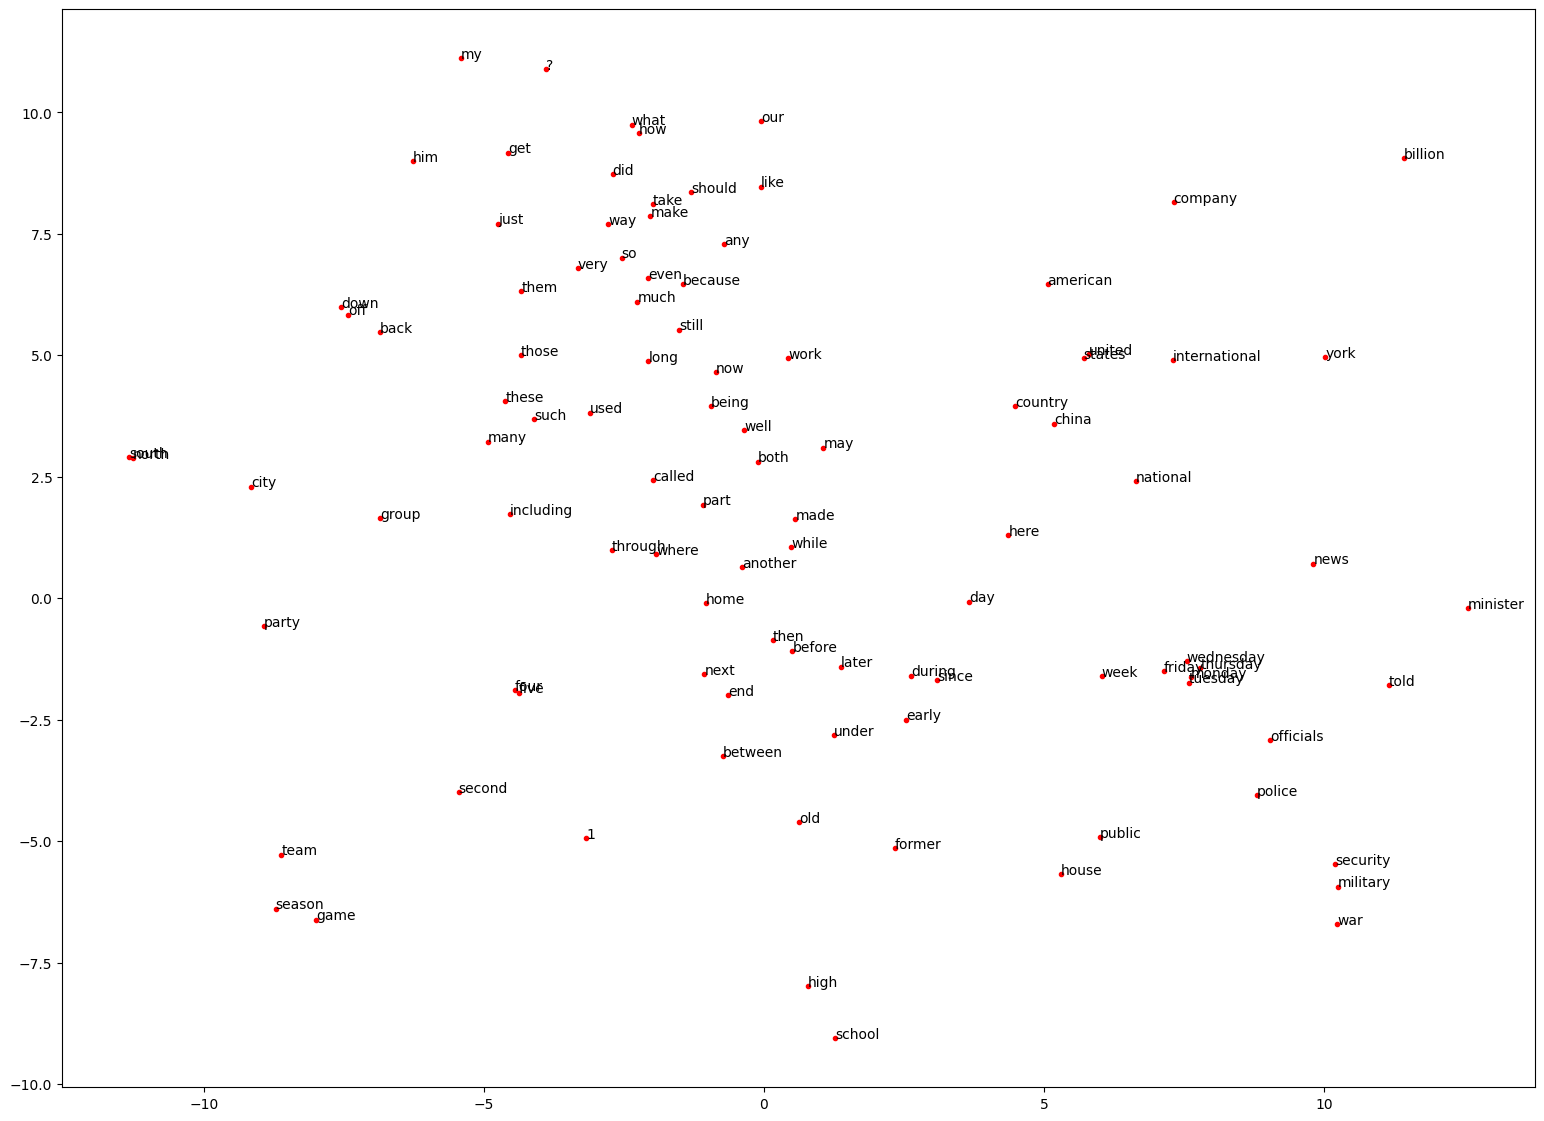

In [258]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np


tsneModel=TSNE(n_components=2,random_state=0)
np.set_printoptions(suppress=True)
model2d=tsneModel.fit_transform(model[model.index_to_key[100:300]])

#%matplotlib inline
plt.figure(figsize=(19,14))
idx=0
for a in model2d[:100]:
    w=model.index_to_key[100+idx]
    plt.plot(a[0],a[1],'r.')
    plt.text(a[0],a[1],w)
    idx+=1
plt.show()


# History of Language Models
Prompt: `how language models evolved from beginning to LLMs. list all critical improvements with short example in chronological order`
https://chatgpt.com/share/8f393a57-165b-4210-a53c-a5275a11c766

## 1. Rule-based Systems (1950s-1980s)
Early language models relied on hand-crafted rules and symbolic processing.

**Example:**

**ELIZA (1966)**: An early natural language processing computer program that used pattern matching and substitution methodology to simulate conversation.

## 2. Statistical Models (1980s-1990s)
Introduction of probabilistic models that utilize statistical methods to predict the next word in a sequence.

**Example:**

**N-gram Models**: Predicts the next word based on the previous n words.
"I am going to the" -> "store" (if "store" is the most probable next word based on previous data)

## 3. Neural Network Language Models (2000s)
Incorporation of neural networks to better capture complex language patterns.

**Example:**

**Feedforward Neural Networks**: Used fixed-size context windows for predictions.
Given the context "I am going to the", predict the next word.

## 4. Word Embeddings (2013)
Development of methods to represent words as dense vectors in a continuous vector space.

**Example:**

**Word2Vec (2013)**: Represents words in high-dimensional space where similar words have similar vectors.
"king" - "man" + "woman" ≈ "queen"

## 5. Recurrent Neural Networks (RNNs) and LSTMs (2014)
Use of RNNs and Long Short-Term Memory networks to handle sequential data and long-range dependencies.

**Example:**

**LSTM**: Handles the sentence "The cat that the dog chased was black" by maintaining context over longer sequences.

## 6. Attention Mechanisms (2015)
Introduction of attention mechanisms to improve the handling of long-range dependencies in sequences.

**Example:**

**Attention is All You Need (2017)**: Proposed the Transformer architecture, which uses self-attention mechanisms.
Transforms "The quick brown fox jumps over the lazy dog" by attending to all words in the sentence.

## 7. Transformer Models (2017)
Transformers revolutionized NLP by enabling better parallelization and handling of context.

**Example:**

**BERT (2018)**: Bidirectional Encoder Representations from Transformers, captures context from both directions.
Masked Language Modeling: "The [MASK] brown fox" -> "quick"

## 8. Pre-trained Language Models and Fine-tuning (2018)
Models pre-trained on large corpora and fine-tuned for specific tasks.

**Example:**

**GPT (2018)**: Generative Pre-trained Transformer, uses a unidirectional approach.
Predicts the next word in "The cat sat on the" -> "mat"

## 9. Large-Scale Language Models (2019-Present)
Training on massive datasets with billions of parameters to create highly capable models.

**Example:**

**GPT-3 (2020)**: With 175 billion parameters, capable of few-shot learning and generating coherent and contextually relevant text.
Generates a paragraph continuation given a prompt.

## 10. Multimodal Models (2021-Present)
Incorporation of multiple types of data (e.g., text, images) to create versatile AI systems.

**Example:**

**DALL-E (2021)**: Generates images from textual descriptions.
"An armchair in the shape of an avocado" -> Generates corresponding image.

## 11. Emergent Abilities in LLMs (2022-Present)
Recognition of emergent capabilities in models as they grow larger and more complex.

**Example:**

**ChatGPT (2022)**: Conversational abilities that can handle complex dialogues and tasks with high coherence.
Engages in a human-like conversation about various topics.

These milestones highlight the significant improvements in language modeling, leading to the sophisticated and highly capable large language models we see today.


# ChatGPT

In [190]:
from openai import OpenAI
client = OpenAI(api_key=OPEN_AI_APIKEY)

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"},
    {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
    {"role": "user", "content": "Where was it played?"}
  ]
)

In [193]:
response.choices[0].message.content

'The 2020 World Series was played at Globe Life Field in Arlington, Texas. This was notably the first time the World Series was played at a neutral site due to the COVID-19 pandemic.'